## Feature Engineering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Step 2: Standardize Column Names
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

# Step 3: Data Type Conversion
for col in ['Age', 'Work Experience', 'Family  Size']:
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce')
    test_df[col] = pd.to_numeric(test_df[col], errors='coerce')

# Step 4: Impute Missing Values
num_cols = ['Age', 'Work Experience', 'Family  Size']
cat_cols = ['Sex', 'Bachelor', 'Graduated', 'Career', 'Variable', 'Family Expenses']

# Impute numerical with median
for col in num_cols:
    median = train_df[col].median()
    train_df[col].fillna(median, inplace=True)
    test_df[col].fillna(median, inplace=True)

# Impute categorical with mode
for col in cat_cols:
    mode = train_df[col].mode()[0]
    train_df[col].fillna(mode, inplace=True)
    test_df[col].fillna(mode, inplace=True)

# Step 5: Encode Categorical Features

# Ordinal encoding for Family Expenses
expenses_map = {'Low': 0, 'Average': 1, 'High': 2}
train_df['Family Expenses'] = train_df['Family Expenses'].map(expenses_map)
test_df['Family Expenses'] = test_df['Family Expenses'].map(expenses_map)

# Drop ID and Description columns
cols_to_drop = ['ID', 'Description']
train_df.drop(columns=cols_to_drop, inplace=True, errors='ignore')
test_df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Save target and drop from train
target = train_df['Segmentation']
train_df.drop(columns=['Segmentation'], inplace=True)

# Combine for one-hot encoding
combined = pd.concat([train_df, test_df], axis=0)

# One-hot encode nominal categorical columns
nominal_cols = ['Sex', 'Bachelor', 'Graduated', 'Career', 'Variable']
combined = pd.get_dummies(combined, columns=nominal_cols, drop_first=True)

# Split back
train_processed = combined.iloc[:len(train_df)].copy()
test_processed = combined.iloc[len(train_df):].copy()

# Add target back to train
train_processed['Segmentation'] = target.values

# Step 6: Feature Scaling
scaler = StandardScaler()
scaled_cols = ['Age', 'Work Experience', 'Family  Size']

# Fit on train, transform both
train_processed[scaled_cols] = scaler.fit_transform(train_processed[scaled_cols])
test_processed[scaled_cols] = scaler.transform(test_processed[scaled_cols])

# Step 7: Export cleaned data
train_processed.to_csv("train_processed.csv", index=False)
test_processed.to_csv("test_processed.csv", index=False)

print(" Feature engineering complete. Files saved as train_processed.csv and test_processed.csv")

✅ Feature engineering complete. Files saved as train_processed.csv and test_processed.csv


C:\Users\User\AppData\Local\Temp\ipykernel_1516\2393559439.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(median, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1516\2393559439.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

## Train

✅ Loaded raw CSVs
✅ scaler.joblib and label_encoder.joblib saved.


C:\Users\User\AppData\Local\Temp\ipykernel_1516\3192658586.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_raw[col].fillna(median, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1516\3192658586.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

✅ Feature engineering complete. Saved cleaned CSVs.
⏳ Tuning XGBoost...


c:\MLCodes\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [06:50:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


⏳ Tuning LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 133
[LightGBM] [Info] Number of data points in the train set: 4517, number of used features: 21
[LightGBM] [Info] Start training from score -1.429037
[LightGBM] [Info] Start training from score -1.456205
[LightGBM] [Info] Start training from score -1.411629
[LightGBM] [Info] Start training from score -1.260207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

c:\MLCodes\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



📊 Validation Evaluation
Accuracy: 0.5336283185840708
F1 Macro: 0.5225032086709083
Classification Report:
               precision    recall  f1-score   support

      Akshat       0.43      0.51      0.47       270
     Bhavesh       0.40      0.34      0.37       263
   Chaitanya       0.59      0.53      0.56       276
       Darsh       0.69      0.71      0.70       321

    accuracy                           0.53      1130
   macro avg       0.53      0.52      0.52      1130
weighted avg       0.53      0.53      0.53      1130



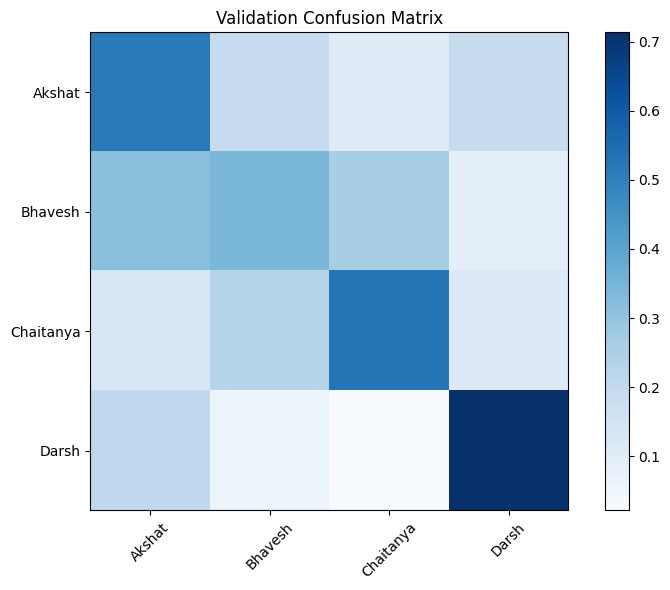


📊 Test (Unknown Data) Evaluation
Accuracy: 0.2569186286658406
F1 Macro: 0.25396093139604614
Classification Report:
               precision    recall  f1-score   support

      Akshat       0.25      0.29      0.27       605
     Bhavesh       0.23      0.20      0.21       563
   Chaitanya       0.25      0.23      0.24       600
       Darsh       0.28      0.30      0.29       653

    accuracy                           0.26      2421
   macro avg       0.25      0.25      0.25      2421
weighted avg       0.26      0.26      0.26      2421



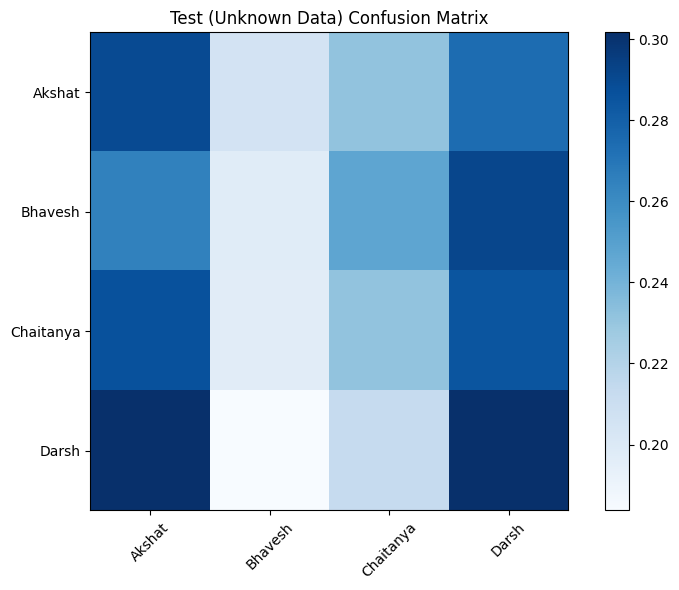

✅ Saved test predictions to submission_with_predictions.csv
✅ Model saved as 'best_tuned_fusion_model.joblib'


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
import joblib
import os

# ---------- Step 1: Load Raw Data ----------
train_raw = pd.read_csv("train.csv")
test_raw = pd.read_csv("test.csv")
print("Loaded raw CSVs")

# ---------- Step 2: Standardize Column Names ----------
train_raw.columns = train_raw.columns.str.strip()
test_raw.columns = test_raw.columns.str.strip()

# ---------- Step 3: Convert Data Types ----------
for col in ['Age', 'Work Experience', 'Family  Size']:
    train_raw[col] = pd.to_numeric(train_raw[col], errors='coerce')
    test_raw[col] = pd.to_numeric(test_raw[col], errors='coerce')

# ---------- Step 4: Impute Missing Values ----------
num_cols = ['Age', 'Work Experience', 'Family  Size']
cat_cols = ['Sex', 'Bachelor', 'Graduated', 'Career', 'Variable', 'Family Expenses']

for col in num_cols:
    median = train_raw[col].median()
    train_raw[col].fillna(median, inplace=True)
    test_raw[col].fillna(median, inplace=True)

for col in cat_cols:
    mode = train_raw[col].mode()[0]
    train_raw[col].fillna(mode, inplace=True)
    test_raw[col].fillna(mode, inplace=True)

# ---------- Step 5: Encode Categorical Features ----------
# Ordinal encoding
expenses_map = {'Low': 0, 'Average': 1, 'High': 2}
train_raw['Family Expenses'] = train_raw['Family Expenses'].map(expenses_map)
test_raw['Family Expenses'] = test_raw['Family Expenses'].map(expenses_map)

# Drop ID, Description
train_raw.drop(columns=['ID', 'Description'], inplace=True, errors='ignore')
test_raw.drop(columns=['ID', 'Description'], inplace=True, errors='ignore')

# Save target and drop temporarily
target = train_raw['Segmentation']
train_raw.drop(columns=['Segmentation'], inplace=True)

# Combine for one-hot encoding
combined = pd.concat([train_raw, test_raw], axis=0)
nominal_cols = ['Sex', 'Bachelor', 'Graduated', 'Career', 'Variable']
combined = pd.get_dummies(combined, columns=nominal_cols, drop_first=True)

# Split back
train_df = combined.iloc[:len(train_raw)].copy()
test_df = combined.iloc[len(train_raw):].copy()
train_df['Segmentation'] = target.values

# ---------- Step 6: Feature Scaling ----------
scaler = StandardScaler()
scale_cols = ['Age', 'Work Experience', 'Family  Size']
train_df[scale_cols] = scaler.fit_transform(train_df[scale_cols])
test_df[scale_cols] = scaler.transform(test_df[scale_cols])

# ---------- Save Scaler and Label Encoder ----------
import joblib

# Save your StandardScaler and LabelEncoder
joblib.dump(scaler, "scaler.joblib")
joblib.dump(label_encoder, "label_encoder.joblib")

print(" scaler.joblib and label_encoder.joblib saved.")


# Save processed CSVs
train_df.to_csv("train_processed.csv", index=False)
test_df.to_csv("test_processed.csv", index=False)
print(" Feature engineering complete. Saved cleaned CSVs.")

# ---------- Step 7: Train-Test Split & Label Encoding ----------
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train_df["Segmentation"])
X = train_df.drop(columns=["Segmentation"])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# ---------- Step 8: Train & Tune Base Models ----------
print(" Tuning XGBoost...")
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', tree_method='hist', random_state=42)
xgb_params = {
    'n_estimators': randint(150, 400),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}
xgb_search = RandomizedSearchCV(xgb, xgb_params, n_iter=20, scoring='f1_macro', n_jobs=-1, cv=3, random_state=42)
xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_

print(" Tuning LightGBM...")
lgbm = LGBMClassifier(random_state=42)
lgbm_params = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(4, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.6, 0.4)
}
lgbm_search = RandomizedSearchCV(lgbm, lgbm_params, n_iter=20, scoring='f1_macro', n_jobs=-1, cv=3, random_state=42)
lgbm_search.fit(X_train, y_train)
best_lgbm = lgbm_search.best_estimator_

# Fast models
best_cat = CatBoostClassifier(verbose=0, random_state=42)
best_rf = RandomForestClassifier(n_estimators=300, max_depth=15, class_weight='balanced', n_jobs=-1, random_state=42)
best_et = ExtraTreesClassifier(n_estimators=300, max_depth=15, n_jobs=-1, random_state=42)

# ---------- Step 9: Stacked Model ----------
stacked_model = StackingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('lgbm', best_lgbm),
        ('cat', best_cat),
        ('rf', best_rf),
        ('et', best_et)
    ],
    final_estimator=LogisticRegression(
        max_iter=1000,
        solver='lbfgs',
        multi_class='multinomial',
        class_weight='balanced',
        random_state=42
    ),
    cv=5,
    n_jobs=-1
)

stacked_model.fit(X_train, y_train)

# ---------- Step 10: Evaluation ----------
def evaluate(name, y_true, y_pred):
    print(f"\n {name} Evaluation")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Macro:", f1_score(y_true, y_pred, average='macro'))
    print("Classification Report:\n", classification_report(y_true, y_pred, target_names=label_encoder.classes_))

    cm = confusion_matrix(y_true, y_pred, normalize='true')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.colorbar()
    ticks = range(len(label_encoder.classes_))
    plt.xticks(ticks, label_encoder.classes_, rotation=45)
    plt.yticks(ticks, label_encoder.classes_)
    plt.tight_layout()
    plt.show()

y_val_pred = stacked_model.predict(X_val)
evaluate("Validation", y_val, y_val_pred)

# ---------- Step 11: Predict Test ----------
# Optional: Load true test labels if available
if os.path.exists("sample_submission.csv"):
    submission_df = pd.read_csv("sample_submission.csv")
    if "Segmentation" in submission_df.columns:
        y_test_true = label_encoder.transform(submission_df["Segmentation"])
        y_test_pred = stacked_model.predict(test_df)
        evaluate("Test (Unknown Data)", y_test_true, y_test_pred)
        submission_df["Predicted"] = label_encoder.inverse_transform(y_test_pred)
        submission_df.to_csv("submission_with_predictions.csv", index=False)
        print(" Saved test predictions to submission_with_predictions.csv")

# ---------- Step 12: Save Model ----------
joblib.dump(stacked_model, "best_tuned_fusion_model.joblib")
print(" Model saved as 'best_tuned_fusion_model.joblib'")
